# Step-by-step demonstration

## Lib Imports and configurations

In [1]:
# %matplotlib notebook
# %matplotlib inline 
%load_ext autoreload
%autoreload 2

import sys
import os
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt
from ruptures.metrics import precision_recall, meantime
import scipy.stats as ss

sys.path.append("Codes/")

import TMPD_utils
import TMPD_class

import warnings
warnings.filterwarnings("ignore")

import gc
gc.enable()

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 150)
# pd.set_option('display.float_format', lambda x: f'{x:,.3f}')
pd.options.display.float_format = '{:.4f}'.format


## Loading event log

In [2]:
# Mapping all event_logs paths
logs_path = glob.glob("Input/Synthetic/Synthetic Event Streams - Resource and Data Perspectives (Antonio)/*.csv")

# Showing mapped paths
print("How many logs? ", len(logs_path))
pd.DataFrame(logs_path).head(30)

How many logs?  3


,0
0,Input/Synthetic/Synthetic Event Streams - Resource and Data Perspectives (Antonio)\recurring_resources_noise0_1000_poc.csv
1,Input/Synthetic/Synthetic Event Streams - Resource and Data Perspectives (Antonio)\recurring_resources_noise0_500_poc.csv
2,Input/Synthetic/Synthetic Event Streams - Resource and Data Perspectives (Antonio)\recurring_time_noise0_1000_baseline.csv


<!-- ![Alt text](../Images/Concept_drift_firstcycle_steps_eng.png "General steps") -->

In [3]:
# Loading first event log
log_path = logs_path[0]
print(log_path.split("\\")[-1].split(".")[0])
event_log = pd.read_csv(log_path, delimiter=";")

# Save original event index
event_log = event_log.reset_index(names='original_index') 


# Showing loaded event log
print("Total events: ", len(event_log))
print("Total cases: ", len(event_log.groupby('case')))
print("Total activities: ", len(event_log.groupby('event')))
event_log.head(15)


recurring_resources_noise0_1000_poc
Total events:  11198
Total cases:  1000
Total activities:  15


,original_index,Event order,case,event,startTime,completeTime,Concept drift,Activity name,Role,Department,Cost,Amount
0,0,0,0,A,2019/01/10 08:00:00,2019/01/10 08:00:00,No,Check application form completeness,Loan Officer,Customer Service,9.9486,9978.7860
1,1,1,1,A,2019/01/10 08:20:00,2019/01/10 08:20:00,No,Check application form completeness,Loan Officer,Customer Service,12.1184,13109.3817
2,2,2,0,B,2019/01/10 08:31:33,2019/01/10 08:31:33,No,Return application back to applicant,Loan Officer,Customer Service,6.9731,9978.7860
3,3,3,2,A,2019/01/10 08:40:00,2019/01/10 08:40:00,No,Check application form completeness,Loan Officer,Customer Service,8.3144,12012.5338
4,4,4,1,D,2019/01/10 08:56:26,2019/01/10 08:56:26,No,Check credit history,Credit Analyst,Customer Service,15.6680,13109.3817
5,5,5,0,C,2019/01/10 08:58:05,2019/01/10 08:58:05,No,Receive updated application,Loan Officer,Customer Service,8.3324,9978.7860
6,6,6,3,A,2019/01/10 09:00:00,2019/01/10 09:00:00,No,Check application form completeness,Loan Officer,Customer Service,9.4452,10560.4655
7,7,7,2,B,2019/01/10 09:05:17,2019/01/10 09:05:17,No,Return application back to applicant,Loan Officer,Customer Service,7.9284,12012.5338
8,8,8,4,A,2019/01/10 09:20:00,2019/01/10 09:20:00,No,Check application form completeness,Loan Officer,Customer Service,12.1763,10783.1078
9,9,9,1,F,2019/01/10 09:28:32,2019/01/10 09:28:32,No,Appraise property,Appraiser,Customer Service,22.3444,13109.3817


## Step 1 - Instantiating class and setting event log

In [4]:
# Iniatializing the TMPD_class
TMPD_instance = TMPD_class.TMPD(scenario='offline')

# Setting the transition log
TMPD_instance.set_transition_log(event_log, case_id='case', activity_key='Activity name', timestamp_key='startTime', timestamp_format="infer", other_columns_keys=["Role", "Department", "Cost", "Amount"])

# Executing the transition log
TMPD_instance.run_transition_log()

# Showing the transition log created
print(len(TMPD_instance.get_transition_log()))
TMPD_instance.get_transition_log().head(15)

12198


,case_id,activity_from,timestamp_from,Role_from,Department_from,Cost_from,Amount_from,event_order_from,activity_to,timestamp_to,Role_to,Department_to,Cost_to,Amount_to,event_order_to,case_order,transition_id
0,0,START,2019-01-10 08:00:00,Loan Officer,Customer Service,9.9486,9978.7860,0,Check_application_form_completeness,2019-01-10 08:00:00,Loan Officer,Customer Service,9.9486,9978.7860,0.0000,0,0
1,0,Check_application_form_completeness,2019-01-10 08:00:00,Loan Officer,Customer Service,9.9486,9978.7860,0,Return_application_back_to_applicant,2019-01-10 08:31:33,Loan Officer,Customer Service,6.9731,9978.7860,2.0000,1,1
2,1,START,2019-01-10 08:20:00,Loan Officer,Customer Service,12.1184,13109.3817,1,Check_application_form_completeness,2019-01-10 08:20:00,Loan Officer,Customer Service,12.1184,13109.3817,1.0000,0,2
3,1,Check_application_form_completeness,2019-01-10 08:20:00,Loan Officer,Customer Service,12.1184,13109.3817,1,Check_credit_history,2019-01-10 08:56:26,Credit Analyst,Customer Service,15.6680,13109.3817,4.0000,1,3
4,0,Return_application_back_to_applicant,2019-01-10 08:31:33,Loan Officer,Customer Service,6.9731,9978.7860,2,Receive_updated_application,2019-01-10 08:58:05,Loan Officer,Customer Service,8.3324,9978.7860,5.0000,2,4
5,2,START,2019-01-10 08:40:00,Loan Officer,Customer Service,8.3144,12012.5338,3,Check_application_form_completeness,2019-01-10 08:40:00,Loan Officer,Customer Service,8.3144,12012.5338,3.0000,0,5
6,2,Check_application_form_completeness,2019-01-10 08:40:00,Loan Officer,Customer Service,8.3144,12012.5338,3,Return_application_back_to_applicant,2019-01-10 09:05:17,Loan Officer,Customer Service,7.9284,12012.5338,7.0000,1,6
7,1,Check_credit_history,2019-01-10 08:56:26,Credit Analyst,Customer Service,15.6680,13109.3817,4,Appraise_property,2019-01-10 09:28:32,Appraiser,Customer Service,22.3444,13109.3817,9.0000,2,7
8,0,Receive_updated_application,2019-01-10 08:58:05,Loan Officer,Customer Service,8.3324,9978.7860,5,Check_application_form_completeness,2019-01-10 09:33:17,Loan Officer,Customer Service,9.4068,9978.7860,10.0000,3,8
9,3,START,2019-01-10 09:00:00,Loan Officer,Customer Service,9.4452,10560.4655,6,Check_application_form_completeness,2019-01-10 09:00:00,Loan Officer,Customer Service,9.4452,10560.4655,6.0000,0,9


## Step 2 - Setting Window Strategy

In [5]:
# Setting the window strategy parameters
TMPD_instance.set_windowing_strategy(window_size_mode = 'Fixed', window_size = 500, window_ref_mode = 'Fixed', overlap = True, sliding_step = 50, continuous = True)

# Executing the window strategy indexation
TMPD_instance.run_windowing_strategy()

# Showing the windows indexes
dict(list(TMPD_instance.get_windowing_strategy().items())[:15])

{0: {'start': 0, 'end': 500},
 1: {'start': 50, 'end': 550},
 2: {'start': 100, 'end': 600},
 3: {'start': 150, 'end': 650},
 4: {'start': 200, 'end': 700},
 5: {'start': 250, 'end': 750},
 6: {'start': 300, 'end': 800},
 7: {'start': 350, 'end': 850},
 8: {'start': 400, 'end': 900},
 9: {'start': 450, 'end': 950},
 10: {'start': 500, 'end': 1000},
 11: {'start': 550, 'end': 1050},
 12: {'start': 600, 'end': 1100},
 13: {'start': 650, 'end': 1150},
 14: {'start': 700, 'end': 1200}}

## Step 3 - Setting Process Representation (using Transition Matrix)

In [6]:
# Setting the Transition Matrix (TM) process representation
TMPD_instance.set_process_representation(threshold_anomaly=0
                                    , control_flow_features={'frequency', 'probability'} #, 'causality', 'parallel'
                                    , time_features={('time_avg','timestamp'), ('time_std','timestamp')}
                                    , resource_features={('categorical_encoding_frequency', 'Role'), ('categorical_encoding_probability', 'Role')
                                                        #  , ('categorical_unique', 'Role'), ('categorical_entropy', 'Role')
                                                         } 
                                    , data_features={('numerical_avg', 'Amount'), ('numerical_std', 'Amount')
                                                        , ('numerical_avg', 'Cost'), ('numerical_std', 'Cost')
                                                        , ('categorical_unique', 'Department'), ('categorical_entropy', 'Department')
                                                        , ('categorical_encoding_frequency', 'Department')#, ('categorical_encoding_probability', 'Department')
                                                    }
                                    ) 

# Executing the process_representation using all dataset just for an example
TMPD_instance.run_process_representation(TMPD_instance.transition_log)

# Showing the process representation created
TMPD_instance.get_process_representation().head(15)

frequency  \
activity_from                              activity_to                                             
Appraise_property                          Assess_loan_risk                                 1000   
Approve_application                        END                                               263   
Assess_eligibility                         Prepare_acceptance_pack                           509   
                                           Reject_application                                491   
Assess_loan_risk                           Assess_eligibility                               1000   
Cancel_application                         END                                               246   
Check_application_form_completeness        Check_credit_history                             1000   
                                           Return_application_back_to_applicant             1054   
Check_credit_history                       Appraise_property                                1000   
Check_if_home_insurance_quote_is_requested Send_acceptance_pack                              256   
                                           Send_home_insurance_quote                         253   
Prepare_acceptance_pack                    Check_if_home_insurance_quote_is_requested        509   
Receive_updated_application                Check_application_form_completeness              1054   
Reject_application                         END                                               491   
Return_application_back_to_applicant       Receive_updated_application                      1054   

                                                                                       percentual  \
activity_from                              activity_to                                              
Appraise_property                          Assess_loan_risk                                0.0820   
Approve_application                        END                                             0.0216   
Assess_eligibility                         Prepare_acceptance_pack                         0.0417   
                                           Reject_application                              0.0403   
Assess_loan_risk                           Assess_eligibility                              0.0820   
Cancel_application                         END                                             0.0202   
Check_application_form_completeness        Check_credit_history                            0.0820   
                                           Return_application_back_to_applicant            0.0864   
Check_credit_history                       Appraise_property                               0.0820   
Check_if_home_insurance_quote_is_requested Send_acceptance_pack                            0.0210   
                                           Send_home_insurance_quote                       0.0207   
Prepare_acceptance_pack                    Check_if_home_insurance_quote_is_requested      0.0417   
Receive_updated_application                Check_application_form_completeness             0.0864   
Reject_application                         END                                             0.0403   
Return_application_back_to_applicant       Receive_updated_application                     0.0864   

                                                                                       probability  \
activity_from                              activity_to                                               
Appraise_property                          Assess_loan_risk                                 1.0000   
Approve_application                        END                                              1.0000   
Assess_eligibility                         Prepare_acceptance_pack                          0.5090   
                                           Reject_application                               0.4910   
Assess_loan_risk                           Assess_eligib

## Step 4 - Setting Change Representation

In [7]:
# Defining the change features
change_features_strategy_dict = {
    'delta_matrix_strategy': 
        {
            ### Control Flow Perspective
            'frequency_delta' : {'process_feature':'frequency', 'method':'aggregation', 'agg_function' : 'sum'}
            # , 'probability_delta' : {'process_feature':'probability', 'method':'aggregation', 'agg_function' : 'sum'}
            # , 'causality_delta' : {'process_feature':'causality', 'method':'aggregation', 'agg_function' : 'sum'}
            # , 'parallel_delta' : {'process_feature':'parallel', 'method':'aggregation', 'agg_function' : 'sum'}
            # , 'frequency_delta_percentage' : {'process_feature':'frequency', 'method':'percentage'}
            # , 'prob_freq_delta_weight' : {'process_feature':'probability', 'method':'aggregation_weight', 'agg_function' : 'sum', 'weight_feature' : 'frequency'}

            ### Time Perspective
            , 'time_avg_delta' : {'process_feature':'time_avg_timestamp', 'method':'aggregation', 'agg_function' : 'sum'}
            , 'time_std_delta' : {'process_feature':'time_std_timestamp', 'method':'aggregation', 'agg_function' : 'sum'}

            ### Resource Perspective
            # , 'role_unique_delta' : {'process_feature':'categorical_unique_Role', 'method':'aggregation', 'agg_function' : 'sum'}
            # , 'role_entropy_delta' : {'process_feature':'categorical_entropy_Role', 'method':'aggregation', 'agg_function' : 'sum'}
            , 'role_encoding_frequency_delta' : {'process_feature':'categorical_encoding_frequency_Role', 'method':'multiple_aggregation', 'agg_function' : 'sum'}
            , 'role_encoding_probability_delta' : {'process_feature':'categorical_encoding_probability_Role', 'method':'multiple_aggregation', 'agg_function' : 'sum'}

            ### Data Perspective
            , 'amount_avg_delta' : {'process_feature':'numerical_avg_Amount', 'method':'aggregation', 'agg_function' : 'sum'}
            # , 'amount_std_delta' : {'process_feature':'numerical_std_Amount', 'method':'aggregation', 'agg_function' : 'sum'}
            , 'cost_avg_delta' : {'process_feature':'numerical_avg_Cost', 'method':'aggregation', 'agg_function' : 'sum'}
            # , 'cost_std_delta' : {'process_feature':'numerical_std_Cost', 'method':'aggregation', 'agg_function' : 'sum'}
            , 'department_unique_delta' : {'process_feature':'categorical_unique_Department', 'method':'aggregation', 'agg_function' : 'sum'}
            , 'department_entropy_delta' : {'process_feature':'categorical_entropy_Department', 'method':'aggregation', 'agg_function' : 'sum'}
            , 'department_encoding_frequency_delta' : {'process_feature':'categorical_encoding_frequency_Department', 'method':'multiple_aggregation', 'agg_function' : 'sum'}
            # , 'department_encoding_probability_delta' : {'process_feature':'categorical_encoding_probability_Department', 'method':'multiple_aggregation', 'agg_function' : 'sum'}
        }
    , 'statistic_test_strategy' : 
        {
            ### Control Flow Perspective
            # 'frequency_gtest_pvalue' : {'process_feature':'frequency', 'method':'g_test', 'contingency_matrix_sum_value' : '5', 'remove_zeros':'True'}
            # , 'frequency_cramersv' : {'process_feature':'frequency', 'method':'cramers_v', 'contingency_matrix_sum_value' : '5', 'remove_zeros':'True'}

            ### Time Perspective
            # ,'time_avg_timestamp_gtest_pvalue' : {'process_feature':'time_avg_timestamp', 'method':'g_test', 'contingency_matrix_sum_value' : '5', 'remove_zeros':'True'}

            ### Resource Perspective
            # , 'role_encoding_frequency_gtest_pvalue' : {'process_feature':'categorical_encoding_frequency_Role', 'method':'multiple_g_test', 'contingency_matrix_sum_value' : '5', 'remove_zeros':'True'}
            # , 'role_encoding_probability_gtest_pvalue' : {'process_feature':'categorical_encoding_probability_Role', 'method':'multiple_g_test', 'contingency_matrix_sum_value' : '5', 'remove_zeros':'True'}

            ### Data Perspective
            # , 'amount_avg_gtest_pvalue' : {'process_feature':'numerical_avg_Amount', 'method':'g_test', 'contingency_matrix_sum_value' : '5', 'remove_zeros':'True'}
            # , 'amount_std_gtest_pvalue' : {'process_feature':'numerical_std_Amount', 'method':'g_test', 'contingency_matrix_sum_value' : '5', 'remove_zeros':'True'}
            # , 'cost_avg_gtest_pvalue' : {'process_feature':'numerical_avg_Cost', 'method':'g_test', 'contingency_matrix_sum_value' : '5', 'remove_zeros':'True'}
            # , 'cost_std_gtest_pvalue' : {'process_feature':'numerical_std_Cost', 'method':'g_test', 'contingency_matrix_sum_value' : '5', 'remove_zeros':'True'}
            # , 'department_encoding_frequency_gtest_pvalue' : {'process_feature':'categorical_encoding_frequency_Department', 'method':'multiple_g_test', 'contingency_matrix_sum_value' : '5', 'remove_zeros':'True'}
            # , 'department_encoding_probability_gtest_pvalue' : {'process_feature':'categorical_encoding_probability_Department', 'method':'multiple_g_test', 'contingency_matrix_sum_value' : '5', 'remove_zeros':'True'}

        }
    }

# Setting Change Representation
TMPD_instance.set_change_representation(change_features_strategy_dict)

# Executing the Change Representation using the window strategy
TMPD_instance.run_change_representation()

# Showing the Change Representation created
TMPD_instance.get_change_representation().head(20)

,start,end,reference_window_index,frequency_delta,time_avg_delta,time_std_delta,role_encoding_frequency_delta,role_encoding_probability_delta,amount_avg_delta,cost_avg_delta,department_unique_delta,department_entropy_delta,department_encoding_frequency_delta
0,0,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50,550,0.0000,36.0000,3.4774,1.8706,144.0000,0.0000,3272.5262,4.1578,0.0000,0.0000,144.0000
2,100,600,0.0000,46.0000,6.7664,3.8306,184.0000,0.0000,5827.7891,6.5118,0.0000,0.0000,184.0000
3,150,650,0.0000,40.0000,6.6906,4.6917,160.0000,0.0000,7398.0540,5.5382,0.0000,0.0000,160.0000
4,200,700,0.0000,50.0000,9.0349,3.9293,200.0000,0.0000,11004.0444,5.6810,0.0000,0.0000,200.0000
5,250,750,0.0000,58.0000,8.9912,5.4244,232.0000,0.0000,15921.8748,6.3947,0.0000,0.0000,232.0000
6,300,800,0.0000,66.0000,9.5154,7.3154,264.0000,0.0000,21379.5175,9.2154,0.0000,0.0000,264.0000
7,350,850,0.0000,86.0000,9.2334,8.0267,344.0000,0.0000,27511.3358,10.7479,0.0000,0.0000,344.0000
8,400,900,0.0000,86.0000,9.9518,9.2690,344.0000,0.0000,27854.9858,9.4078,0.0000,0.0000,344.0000
9,450,950,0.0000,80.0000,10.9114,10.5169,320.0000,0.0000,26331.3663,10.7881,0.0000,0.0000,320.0000


## Step 5 - Setting Detection Task

In [8]:
# Defining detection strategies
detection_task_strategy_dict = {
    'time_series_strategy': 
    {
        ### Control Flow Perspective
        'cpd_frequency_delta' : {'change_features':['frequency_delta'], 'method':'cpd_pelt', 'smooth' : '3'} #, 'model' : 'rbf', 'cost' : 'rpt.costs.CostRbf()', 'min_size' : '1', 'jump' : '1'
        # , 'cpd_prob_freq_delta' : {'change_features':['prob_freq_delta_weight'], 'method':'cpd_pelt', 'smooth' : '3'} #, 'model' : 'rbf', 'cost' : 'rpt.costs.CostRbf()', 'min_size' : '1', 'jump' : '1'
        # , 'cpd_prob_causality_delta' : {'change_features':['causality_delta'], 'method':'cpd_pelt', 'smooth' : '3'} #, 'model' : 'rbf', 'cost' : 'rpt.costs.CostRbf()', 'min_size' : '1', 'jump' : '1'
        # , 'cpd_prob_parallel_delta' : {'change_features':['parallel_delta'], 'method':'cpd_pelt', 'smooth' : '3'} #, 'model' : 'rbf', 'cost' : 'rpt.costs.CostRbf()', 'min_size' : '1', 'jump' : '1'
        # , 'cramersv_frequency' : {'change_features':['frequency_cramersv'], 'method':'cpd_pelt', 'smooth' : '3'} #, 'model' : 'rbf', 'cost' : 'rpt.costs.CostRbf()', 'min_size' : '1', 'jump' : '1'

        ### Time Perspective
        , 'cpd_time_avg_delta' : {'change_features':['time_avg_delta'], 'method':'cpd_pelt', 'smooth' : '3'} #, 'model' : 'rbf', 'cost' : 'rpt.costs.CostRbf()', 'min_size' : '1', 'jump' : '1'
        , 'cpd_time_std_delta' : {'change_features':['time_std_delta'], 'method':'cpd_pelt', 'smooth' : '3'} #, 'model' : 'rbf', 'cost' : 'rpt.costs.CostRbf()', 'min_size' : '1', 'jump' : '1'

        ### Resource Perspective
        # , 'cpd_role_unique_delta' : {'change_features':['role_unique_delta'], 'method':'cpd_pelt', 'smooth' : '3'} #, 'model' : 'rbf', 'cost' : 'rpt.costs.CostRbf()', 'min_size' : '1', 'jump' : '1'
        # , 'cpd_role_entropy_delta' : {'change_features':['role_entropy_delta'], 'method':'cpd_pelt', 'smooth' : '3'} #, 'model' : 'rbf', 'cost' : 'rpt.costs.CostRbf()', 'min_size' : '1', 'jump' : '1'
        , 'cpd_role_encoding_frequency_delta' : {'change_features':['role_encoding_frequency_delta'], 'method':'cpd_pelt', 'smooth' : '3'} #, 'model' : 'rbf', 'cost' : 'rpt.costs.CostRbf()', 'min_size' : '1', 'jump' : '1'
        , 'cpd_role_encoding_probability_delta' : {'change_features':['role_encoding_probability_delta'], 'method':'cpd_pelt', 'smooth' : '3'} #, 'model' : 'rbf', 'cost' : 'rpt.costs.CostRbf()', 'min_size' : '1', 'jump' : '1'

        ### Data Perspective
        , 'cpd_amount_avg_delta' : {'change_features':['amount_avg_delta'], 'method':'cpd_pelt', 'smooth' : '3'} #, 'model' : 'rbf', 'cost' : 'rpt.costs.CostRbf()', 'min_size' : '1', 'jump' : '1'
        # , 'cpd_amount_std_delta' : {'change_features':['amount_std_delta'], 'method':'cpd_pelt', 'smooth' : '3'} #, 'model' : 'rbf', 'cost' : 'rpt.costs.CostRbf()', 'min_size' : '1', 'jump' : '1'
        , 'cpd_cost_avg_delta' : {'change_features':['cost_avg_delta'], 'method':'cpd_pelt', 'smooth' : '3'} #, 'model' : 'rbf', 'cost' : 'rpt.costs.CostRbf()', 'min_size' : '1', 'jump' : '1'
        # , 'cpd_cost_std_delta' : {'change_features':['cost_std_delta'], 'method':'cpd_pelt', 'smooth' : '3'} #, 'model' : 'rbf', 'cost' : 'rpt.costs.CostRbf()', 'min_size' : '1', 'jump' : '1'
        , 'cpd_department_unique_delta' : {'change_features':['department_unique_delta'], 'method':'cpd_pelt', 'smooth' : '3'} #, 'model' : 'rbf', 'cost' : 'rpt.costs.CostRbf()', 'min_size' : '1', 'jump' : '1
        , 'cpd_department_entropy_delta' : {'change_features':['department_entropy_delta'], 'method':'cpd_pelt', 'smooth' : '3'} #, 'model' : 'rbf', 'cost' : 'rpt.costs.CostRbf()', 'min_size' : '1', 'jump' : '1
        , 'cpd_department_encoding_frequency_delta' : {'change_features':['department_encoding_frequency_delta'], 'method':'cpd_pelt', 'smooth' : '3'} #, 'model' : 'rbf', 'cost' : 'rpt.costs.CostRbf()', 'min_size' : '1', 'jump' : '1
        # , 'cpd_department_encoding_probability_delta' : {'change_features':['department_encoding_probability_delta'], 'method':'cpd_pelt', 'smooth' : '3'} #, 'model' : 'rbf', 'cost' : 'rpt.costs.CostRbf()', 'min_size' : '1', 'jump' : '1
    }
    , 'threshold_strategy' : 
    {
        ### Control Flow Perspective
        # 'gtest_frequency' : {'change_features':['frequency_gtest_pvalue'], 'method':'comparison_operator', 'operator' : 'le', 'threshold_value' : '0.025', 'smooth' : '3'}
        # , 'cramersv_frequency' : {'change_features':['frequency_cramersv'], 'method':'comparison_operator', 'operator' : 'ge', 'threshold_value' : '0.05', 'smooth' : '3'}
        # , 'fixed_frequency_delta_percentage' : {'change_features':['frequency_delta_percentage'], 'method':'comparison_operator', 'operator' : 'ge', 'threshold_value' : '0.05', 'smooth' : '3'}

        ### Time Perspective
        # ,'gtest_time_avg_timestamp' : {'change_features':['time_avg_timestamp_gtest_pvalue'], 'method':'comparison_operator', 'operator' : 'le', 'threshold_value' : '0.025', 'smooth' :'3'}

        ### Resource Perspective
        # , 'gtest_role_encoding_frequency' : {'change_features':['role_encoding_frequency_gtest_pvalue'], 'method':'comparison_operator', 'operator' : 'le', 'threshold_value' : '0.025', 'smooth' :'3'}
        # , 'gtest_role_encoding_probability' : {'change_features':['role_encoding_probability_gtest_pvalue'], 'method':'comparison_operator', 'operator' : 'le', 'threshold_value' : '0.025', 'smooth' :'3'}

        ### Data Perspective
        # , 'gtest_amount_avg' : {'change_features':['amount_avg_gtest_pvalue'], 'method':'comparison_operator', 'operator' : 'le', 'threshold_value' : '0.025', 'smooth' :'3'}
        # , 'gtest_amount_std' : {'change_features':['amount_std_gtest_pvalue'], 'method':'comparison_operator', 'operator' : 'le', 'threshold_value' : '0.025', 'smooth' :'3'}
        # , 'gtest_cost_avg' : {'change_features':['cost_avg_gtest_pvalue'], 'method':'comparison_operator', 'operator' : 'le', 'threshold_value' : '0.025', 'smooth' :'3'}
        # , 'gtest_cost_std' : {'change_features':['cost_std_gtest_pvalue'], 'method':'comparison_operator', 'operator' : 'le', 'threshold_value' : '0.025', 'smooth' :'3'}
        # , 'gtest_department_encoding_frequency' : {'change_features':['department_encoding_frequency_gtest_pvalue'], 'method':'comparison_operator', 'operator' : 'le', 'threshold_value' : '0.025', 'smooth' :'3'}
        # , 'gtest_department_encoding_probability' : {'change_features':['department_encoding_probability_gtest_pvalue'], 'method':'comparison_operator', 'operator' : 'le', 'threshold_value' : '0.025', 'smooth' :'3'}
        
    }
}

# Setting Detection Task
TMPD_instance.set_detection_task(detection_task_strategy_dict)

# Executing the Detection Task
TMPD_instance.run_detection_task()

# Showing Detection Task Results
TMPD_instance.get_detection_task()


,detection_strategy,detection_feature,detection_results
0,time_series_strategy,cpd_frequency_delta,"[44, 75, 92, 125, 137, 197, 216, 234]"
1,time_series_strategy,cpd_time_avg_delta,"[71, 82, 162, 234]"
2,time_series_strategy,cpd_time_std_delta,"[73, 84, 156, 167, 234]"
3,time_series_strategy,cpd_role_encoding_frequency_delta,"[44, 78, 155, 166, 234]"
4,time_series_strategy,cpd_role_encoding_probability_delta,"[72, 83, 155, 166, 234]"
5,time_series_strategy,cpd_amount_avg_delta,"[71, 82, 152, 163, 234]"
6,time_series_strategy,cpd_cost_avg_delta,"[70, 81, 154, 165, 234]"
7,time_series_strategy,cpd_department_unique_delta,"[70, 84, 153, 166, 234]"
8,time_series_strategy,cpd_department_entropy_delta,"[72, 84, 153, 166, 234]"
9,time_series_strategy,cpd_department_encoding_frequency_delta,"[71, 82, 155, 166, 234]"


In [9]:
# Grounding truth
log_size = event_log['case'].nunique()
ground_truth_traces_indexes = list(range(int(log_size/3), log_size, int(log_size/3+1)))

transition_log = TMPD_instance.get_transition_log()
ground_truth_events_indexes = transition_log[transition_log['case_id'].isin(ground_truth_traces_indexes)].groupby('case_id').first()['transition_id'].to_list()

# signals_indexes = signals.reset_index()
signals = TMPD_instance.get_change_representation()
ground_truth = []
for ground_truth_events_index in ground_truth_events_indexes:
    ground_truth.extend(signals[(signals['start'] <= ground_truth_events_index) 
                & (signals['end'] >= ground_truth_events_index)].head(1).index.to_list())
ground_truth = ground_truth + [len(signals)]
print("ground_truth: ", ground_truth)

ground_truth:  [73, 154, 234]


In [10]:
### Validation metrics
margin_error_defined=3
detection_task_results = TMPD_instance.get_detection_task()
for index, row in detection_task_results.iterrows():
    try:
        detection_task_results.loc[index, 'ground_truth'] = str(ground_truth)

        # smooth = int(detection_task_strategy_dict[row['detection_strategy']][row['detection_feature']]['smooth'])

        # Margin of error give more margin to overlap if used.
        margin_error = int(margin_error_defined + 1)  if TMPD_instance.overlap == False else int(margin_error_defined + 1 + TMPD_instance.window_size/TMPD_instance.sliding_step)

        precision, recall = precision_recall(ground_truth, row['detection_results'], margin=margin_error)

        f1 = round(ss.hmean([precision, recall]),2)
        detection_task_results.loc[index, 'f1'] = f1
        
        delay = round(meantime(ground_truth, row['detection_results']), 2)
        detection_task_results.loc[index, 'delay'] = delay

    except Exception as e:
        print("Error:", e)
        detection_task_results.loc[index, 'ground_truth'] = str(ground_truth)
        detection_task_results.loc[index, 'f1'] = np.nan
        detection_task_results.loc[index, 'delay'] = np.nan

detection_task_results

,detection_strategy,detection_feature,detection_results,ground_truth,f1,delay
0,time_series_strategy,cpd_frequency_delta,"[44, 75, 92, 125, 137, 197, 216, 234]","[73, 154, 234]",0.2200,28.7100
1,time_series_strategy,cpd_time_avg_delta,"[71, 82, 162, 234]","[73, 154, 234]",0.8000,6.3300
2,time_series_strategy,cpd_time_std_delta,"[73, 84, 156, 167, 234]","[73, 154, 234]",0.6700,6.5000
3,time_series_strategy,cpd_role_encoding_frequency_delta,"[44, 78, 155, 166, 234]","[73, 154, 234]",0.6700,11.7500
4,time_series_strategy,cpd_role_encoding_probability_delta,"[72, 83, 155, 166, 234]","[73, 154, 234]",0.6700,6.0000
5,time_series_strategy,cpd_amount_avg_delta,"[71, 82, 152, 163, 234]","[73, 154, 234]",0.6700,5.5000
6,time_series_strategy,cpd_cost_avg_delta,"[70, 81, 154, 165, 234]","[73, 154, 234]",0.6700,5.5000
7,time_series_strategy,cpd_department_unique_delta,"[70, 84, 153, 166, 234]","[73, 154, 234]",0.6700,6.7500
8,time_series_strategy,cpd_department_entropy_delta,"[72, 84, 153, 166, 234]","[73, 154, 234]",0.6700,6.2500
9,time_series_strategy,cpd_department_encoding_frequency_delta,"[71, 82, 155, 166, 234]","[73, 154, 234]",0.6700,6.0000


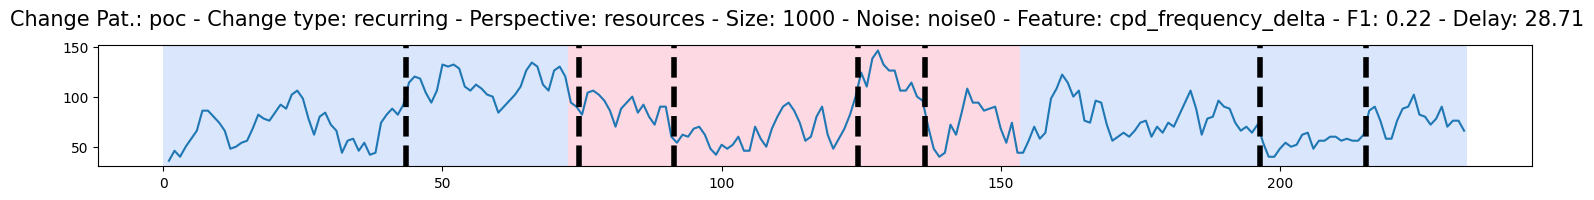

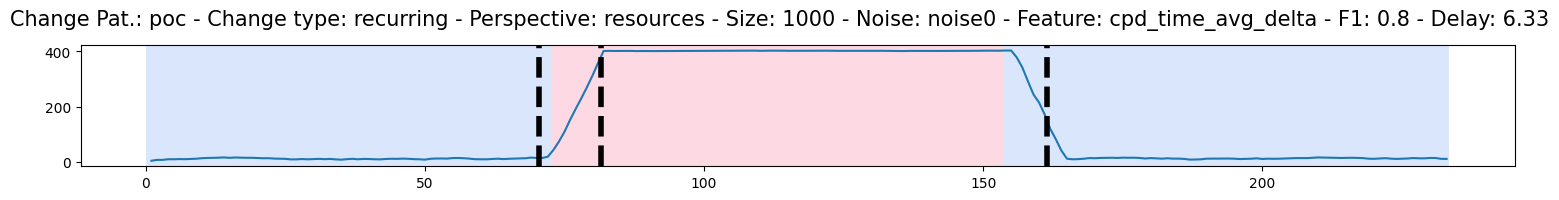

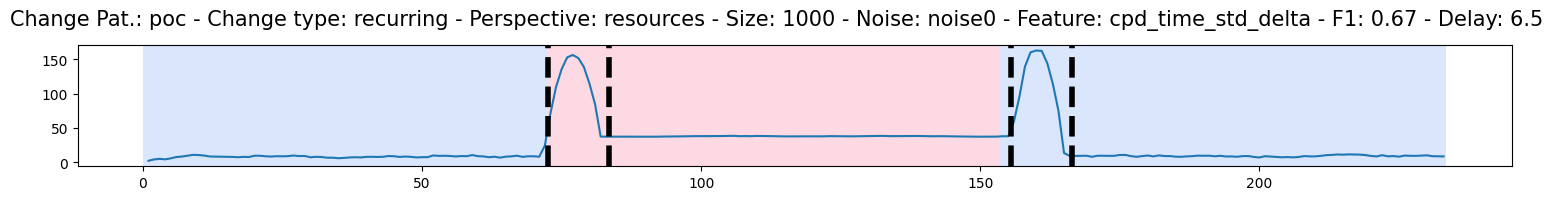

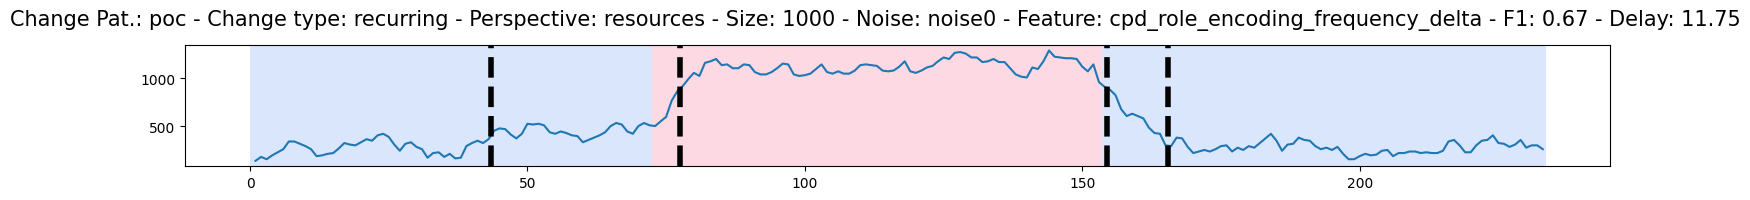

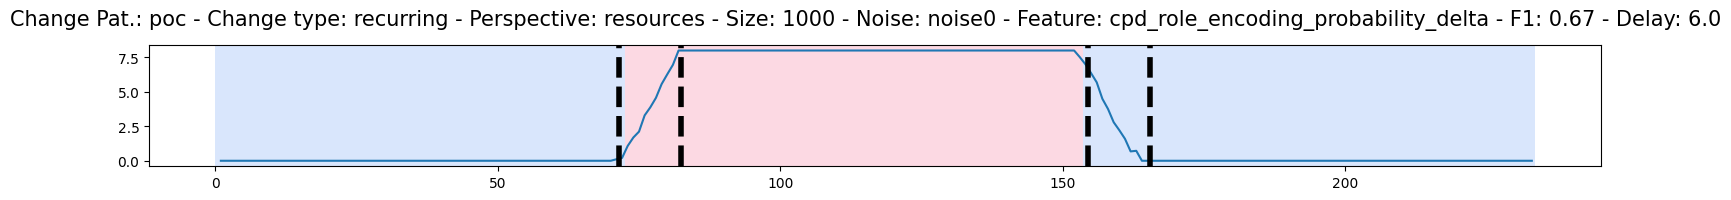

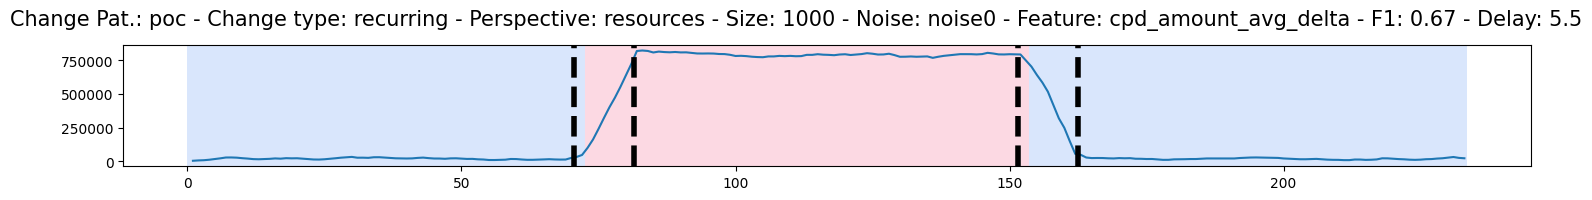

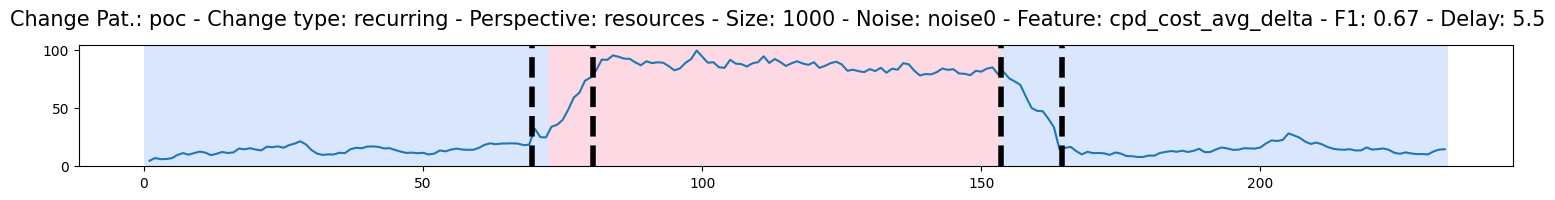

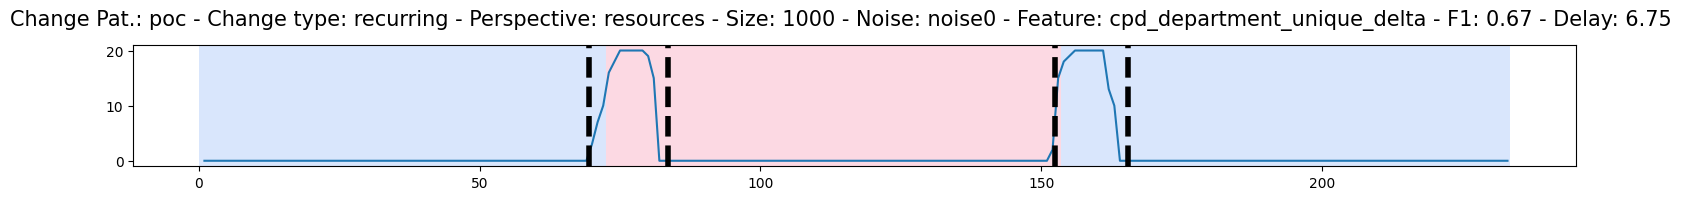

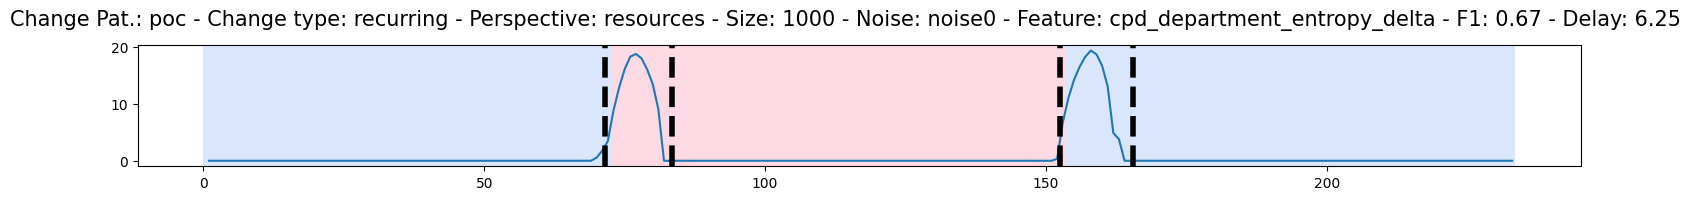

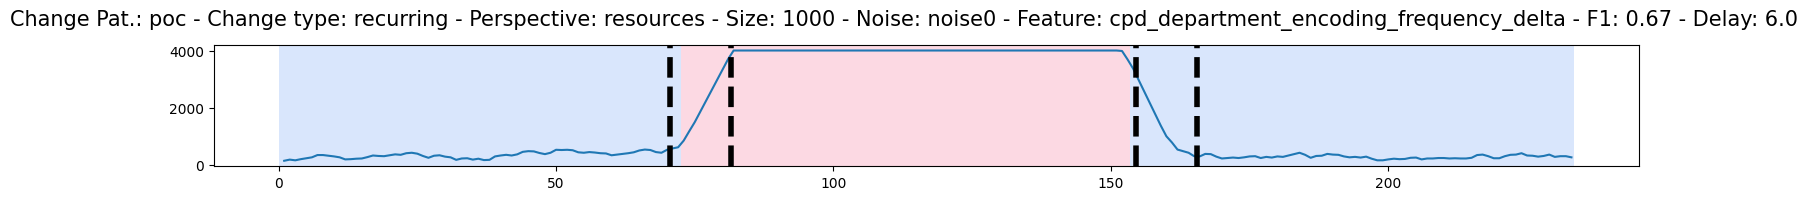

In [11]:
# Display Detection Task Results 
for result in detection_task_results.itertuples():
    fig, axarr = rpt.display(signal = TMPD_instance.get_change_representation()[TMPD_instance.detection_task_strategy_dict[result.detection_strategy][result.detection_feature]['change_features']]
                , true_chg_pts=ground_truth
                , computed_chg_pts = result.detection_results
                , computed_chg_pts_color = "k"
                , computed_chg_pts_linewidth = 4
                , computed_chg_pts_linestyle = "--"
                , computed_chg_pts_alpha = 1
                , figsize=(15, 2)
                )
    plt.suptitle("Change Pat.: " + log_path.split("/")[-1].split("_")[-1].split(".")[0]
                 + " - Change type: " + log_path.split("/")[-1].split("_")[-5].split("\\")[-1]
                 + " - Perspective: " + log_path.split("/")[-1].split("_")[-4]
                 + " - Size: " + log_path.split("/")[-1].split("_")[-2]
                 + " - Noise: " + log_path.split("/")[-1].split("_")[-3] 
                 + " - Feature: " + result.detection_feature
                 + " - F1: " + str(result.f1) 
                 + " - Delay: " + str(result.delay)
                 , fontsize=15)

    plt.subplots_adjust(top=0.8)
    plt.show()

## Step 6a - Setting Localization Task

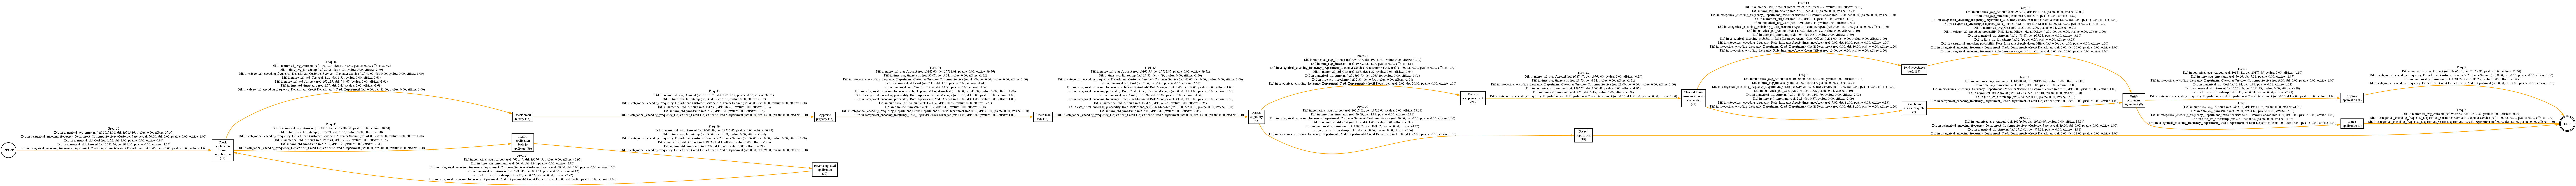

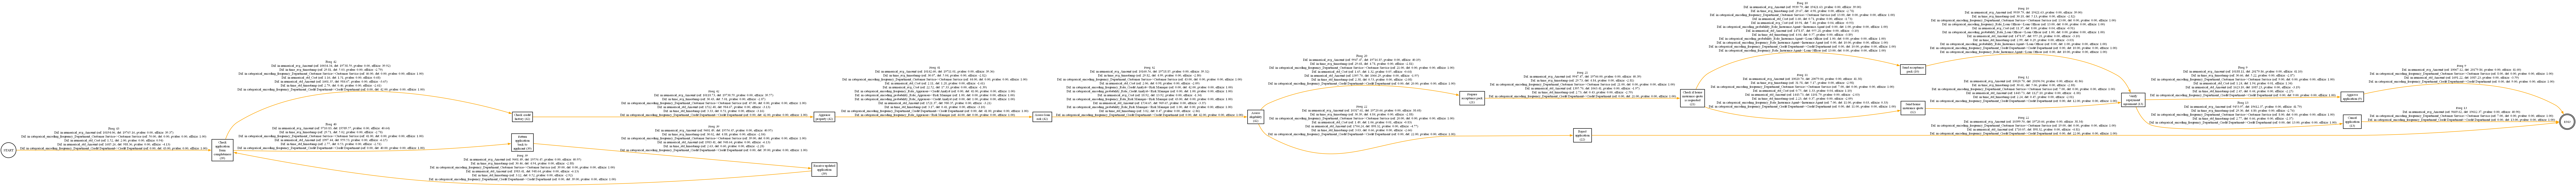

In [12]:
# Setting Localization Task
reference_window_index=0 
detection_window_index=100

TMPD_instance.set_localization_task(reference_window_index=reference_window_index, detection_window_index=detection_window_index, pvalue_threshold=0.05, effect_threshold=0.2, presence_percentage_threshold=0.01, pseudo_count=5)

# Executing Localization Task
TMPD_instance.run_localization_task()

# Showing Localization Task Results
significant_transition_changes, high_level_changes, reference_bpmn_text, detection_bpmn_text = TMPD_instance.get_localization_task(show_localization_dfg=True, show_original_dfg=False, show_original_bpmn=False)

In [13]:
significant_transition_changes

,transition,feature,perspective,transition_status,activity_status,p_value,effect_size,ref_value,det_value,dif_value
0,"(Appraise_property, Assess_loan_risk)",numerical_avg_Amount,data,significant difference,no change,0.0000,39.3598,10142.6003,19711.0093,9568.4091
1,"(Appraise_property, Assess_loan_risk)",time_avg_timestamp,time,significant difference,no change,0.0000,-2.8220,30.0689,5.0374,-25.0315
2,"(Appraise_property, Assess_loan_risk)",categorical_encoding_frequency_Department_Customer Service->Customer Service,resource,deleted,no change,0.0000,1.0000,44.0000,0.0000,-44.0000
3,"(Appraise_property, Assess_loan_risk)",numerical_std_Cost,data,significant difference,no change,0.0000,-1.6101,2.1114,1.2764,-0.8350
4,"(Appraise_property, Assess_loan_risk)",numerical_avg_Cost,data,significant difference,no change,0.0000,-1.3905,22.5157,17.3347,-5.1810
...,...,...,...,...,...,...,...,...,...,...
135,"(Verify_repayment_agreement, Cancel_application)",numerical_avg_Amount,data,significant difference,no change,0.0000,41.7868,9453.9655,19612.3688,10158.4033
136,"(Verify_repayment_agreement, Cancel_application)",time_avg_timestamp,time,significant difference,no change,0.0008,-2.7615,29.2958,4.8013,-24.4946
137,"(Verify_repayment_agreement, Cancel_application)",categorical_encoding_frequency_Department_Customer Service->Customer Service,resource,deleted,no change,0.0000,1.0000,8.0000,0.0000,-8.0000
138,"(Verify_repayment_agreement, Cancel_application)",time_std_timestamp,time,significant difference,no change,0.0018,-2.3731,2.7688,0.6555,-2.1133


In [14]:
high_level_changes

{'Transitions with variations in numerical_avg_Amount': [('Appraise_property',
   'Assess_loan_risk'),
  ('Approve_application', 'END'),
  ('Assess_eligibility', 'Prepare_acceptance_pack'),
  ('Assess_eligibility', 'Reject_application'),
  ('Assess_loan_risk', 'Assess_eligibility'),
  ('Cancel_application', 'END'),
  ('Check_application_form_completeness', 'Check_credit_history'),
  ('Check_application_form_completeness',
   'Return_application_back_to_applicant'),
  ('Check_credit_history', 'Appraise_property'),
  ('Check_if_home_insurance_quote_is_requested', 'Send_acceptance_pack'),
  ('Check_if_home_insurance_quote_is_requested', 'Send_home_insurance_quote'),
  ('Prepare_acceptance_pack', 'Check_if_home_insurance_quote_is_requested'),
  ('Receive_updated_application', 'Check_application_form_completeness'),
  ('Reject_application', 'END'),
  ('Return_application_back_to_applicant', 'Receive_updated_application'),
  ('START', 'Check_application_form_completeness'),
  ('Send_acceptan

In [15]:
reference_bpmn_text, detection_bpmn_text

("Sequence( Loop( 'Check_application_form_completeness', Sequence( 'Return_application_back_to_applicant', 'Receive_updated_application' ) ), 'Check_credit_history', 'Appraise_property', 'Assess_loan_risk', 'Assess_eligibility', Conditional( 'Reject_application', Sequence( 'Prepare_acceptance_pack', 'Check_if_home_insurance_quote_is_requested', Conditional( 'Send_acceptance_pack', 'Send_home_insurance_quote' ), 'Verify_repayment_agreement', Conditional( 'Approve_application', 'Cancel_application' ) ) ) )",
 "Sequence( Loop( 'Check_application_form_completeness', Sequence( 'Return_application_back_to_applicant', 'Receive_updated_application' ) ), 'Check_credit_history', 'Appraise_property', 'Assess_loan_risk', 'Assess_eligibility', Conditional( 'Reject_application', Sequence( 'Prepare_acceptance_pack', 'Check_if_home_insurance_quote_is_requested', Conditional( 'Send_acceptance_pack', 'Send_home_insurance_quote' ), 'Verify_repayment_agreement', Conditional( 'Approve_application', 'Cancel

In [16]:
# # Debug

# ## Getting the reference window
# TMPD_instance.run_process_representation(TMPD_instance.transition_log[TMPD_instance.get_windowing_strategy()[reference_window_index]['start']:TMPD_instance.get_windowing_strategy()[reference_window_index]['end']])
# reference_window_df = TMPD_instance.get_process_representation()
# reference_window_df.to_csv("reference_window_df.csv")
# reference_window_df

In [17]:
# ## Getting the detection window
# TMPD_instance.run_process_representation(TMPD_instance.transition_log[TMPD_instance.get_windowing_strategy()[detection_window_index]['start']:TMPD_instance.get_windowing_strategy()[detection_window_index]['end']])
# detection_window_df = TMPD_instance.get_process_representation()
# detection_window_df.to_csv("detection_window_df.csv")
# detection_window_df

## Step 6b - Setting Characterization Task

In [18]:
# Setting Characterization Task
# TMPD_instance.set_characterization_task(llm_company = "openai", llm_model="gpt-4o", api_key_path='Temp/openai_api_key.txt', llm_instructions_path='Codes/LLM_Instructions/instructions_general_approach.yaml') # "gpt-4o", "gpt-3.5-turbo-0125", "gpt-4"
TMPD_instance.set_characterization_task(llm_company = "google", llm_model="gemini-2.5-flash", api_key_path='Temp/google_api_key.txt', llm_instructions_path='Codes/LLM_Instructions/instructions_general_approach.yaml')

# Executing Characterization Task
TMPD_instance.run_characterization_task()

# Showing Characterization Task Results
characterization_prompt, characterization_response = TMPD_instance.get_characterization_task()

In [19]:
print(characterization_prompt)

### Role and Goal ###
You are an expert process mining analyst specializing in concept drift characterization. Your objective is to deeply understand and explain the transformation observed between two versions of a business process. This includes identifying what changed, how the changes are interconnected, and what broader patterns and impacts they suggest — always grounded in the provided data sources.

**Your analysis must go beyond simply listing differences.** The user has access to the raw data and statistical tables. Your job is to interpret this information holistically, identify key insights, and present a coherent narrative that explains the *nature*, *scope*, and *interconnectedness* of the changes.

### Input Data ###
  - reference_transition_matrix: Transition matrix BEFORE change with columns:
      * activity_from, activity_to: transition identifiers (always available)
      * frequency, percentual: control-flow metrics (always available)
      * Additional columns depe

In [20]:
print(characterization_response)

### 1. Executive Summary ###
The observed transformation represents a significant **behavioral and organizational shift** within a stable process structure. While the core control-flow remains unchanged, there's a pervasive **acceleration in process execution times**, a dramatic **increase in the average transaction amount**, and a complete **reallocation of departmental responsibilities** from "Customer Service" to the "Credit Department". These changes are global in scope, affecting nearly all transitions, and suggest a strategic move towards higher-value, more efficiently processed applications, driven by a centralized and specialized operational model.

### 2. Integrated Change Characterization ###

**Control-Flow Evolution**
The analysis of both the reference and detection BPMN diagrams reveals **no structural changes** to the process. There are no new or deleted activities, nor any alterations to the sequence, parallel, or conditional logic. The process model, as defined by its a

## Step 6c - Setting Explanation Task

In [21]:
# TODO